# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Load train dataset

In [2]:
training = pd.read_csv("training.csv")

# Peak dataset

In [3]:
training.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Remove unnecessary columns

In [4]:
training = training.drop("education", 1)

# Replace all '?' by NaN and drop rows containing the latter

In [5]:
for data in training:
    training[data].replace(' ?', np.nan, inplace=True)
    
print(training.isnull().any(axis=1).sum())

training.dropna(inplace=True)

2399


# Turning non-numerical values into numerical

In [6]:
ord_enc = OrdinalEncoder()
for i in ['workclass','marital-status','occupation','relationship','race','sex','native-country','salary-classification']:
    training[i] = ord_enc.fit_transform(training[[i]]).astype(int)

# Get summary of dataframe

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   age                    30162 non-null  int64
 1   workclass              30162 non-null  int64
 2   fnlwgt                 30162 non-null  int64
 3   education-num          30162 non-null  int64
 4   marital-status         30162 non-null  int64
 5   occupation             30162 non-null  int64
 6   relationship           30162 non-null  int64
 7   race                   30162 non-null  int64
 8   sex                    30162 non-null  int64
 9   capital-gain           30162 non-null  int64
 10  capital-loss           30162 non-null  int64
 11  hours-per-week         30162 non-null  int64
 12  native-country         30162 non-null  int64
 13  salary-classification  30162 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


# Get descriptive statistics

In [8]:
training.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

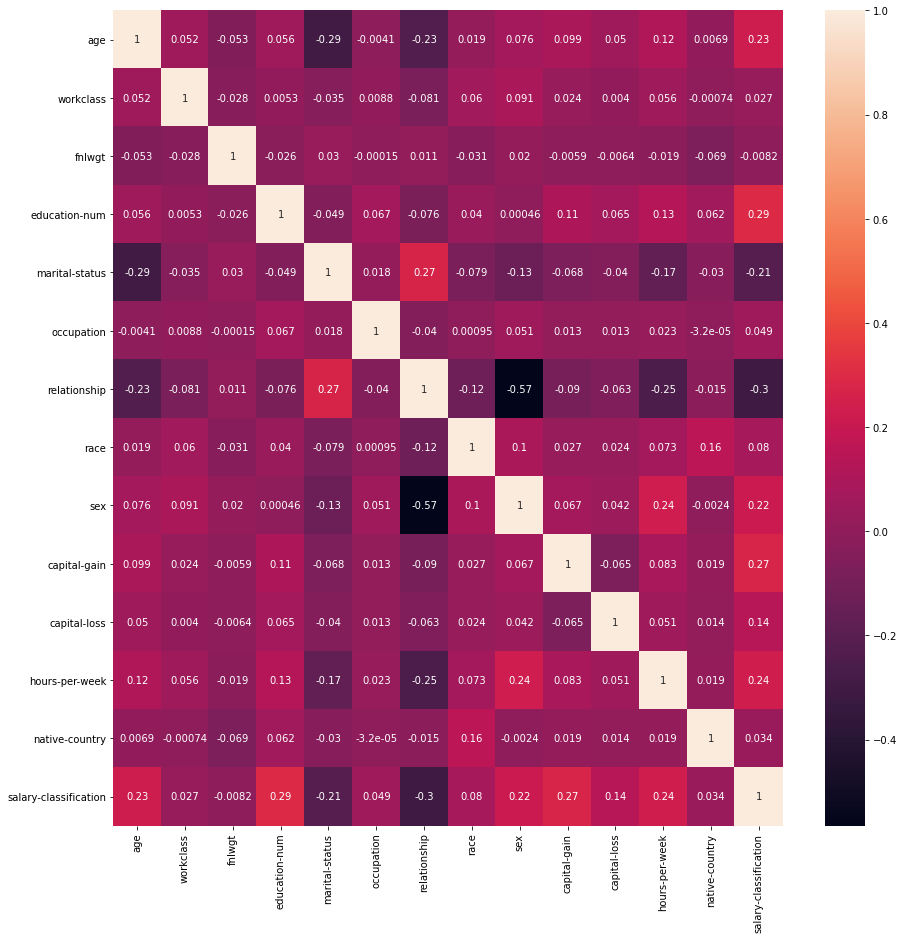

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(training.corr(method='kendall'), annot=True,ax=ax)

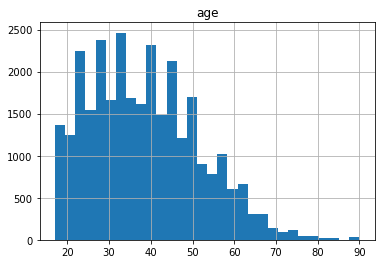

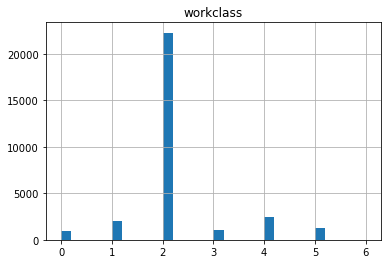

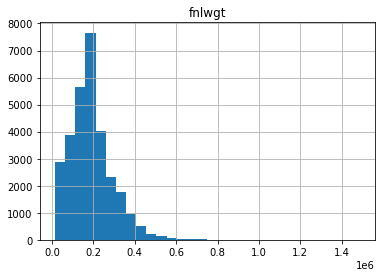

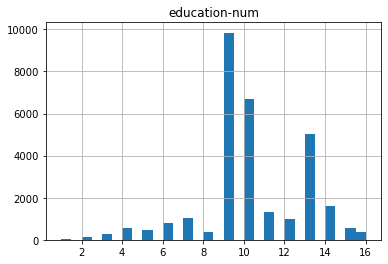

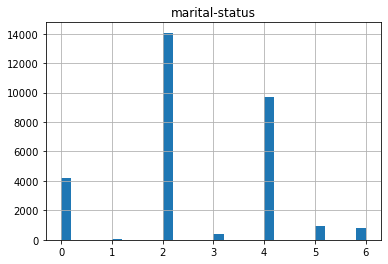

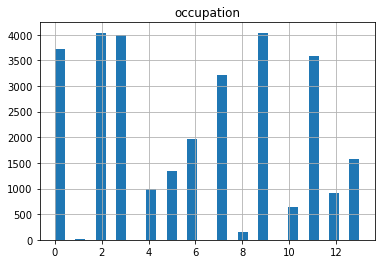

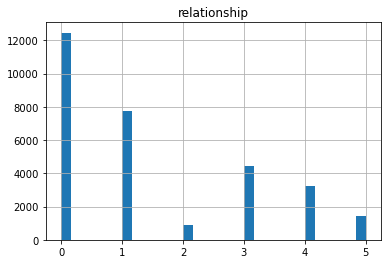

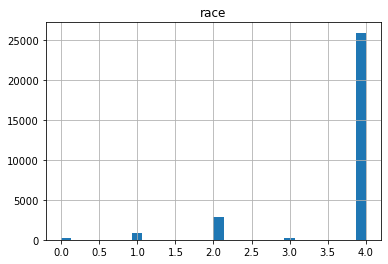

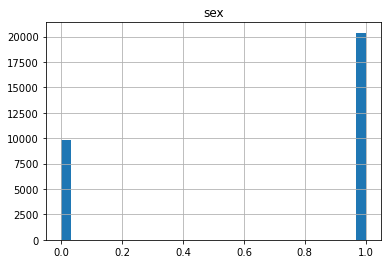

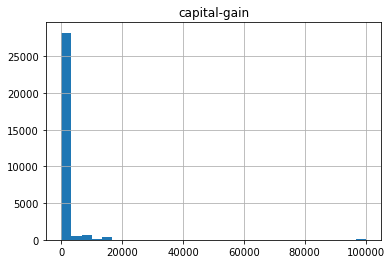

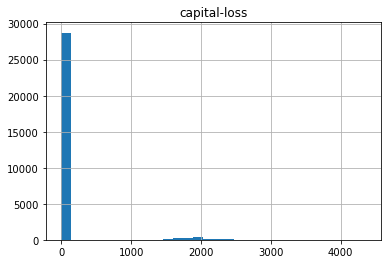

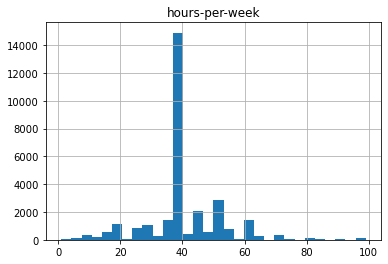

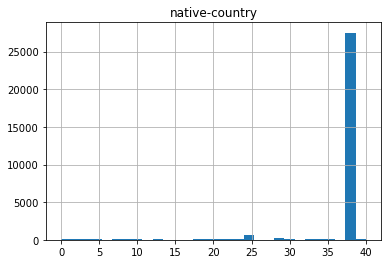

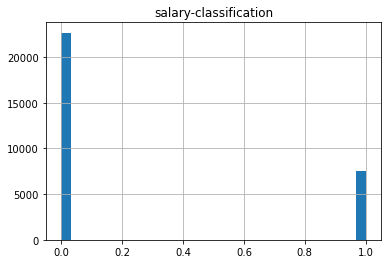

In [10]:
for key in training.keys():
    training.hist(column=key,bins=30)

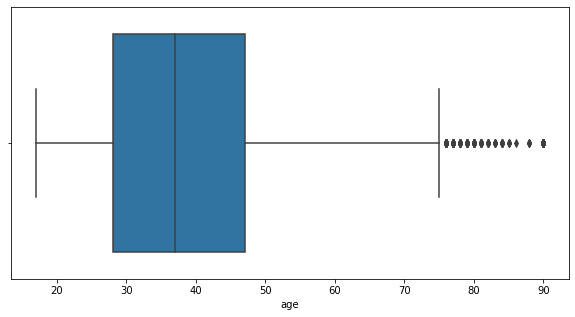

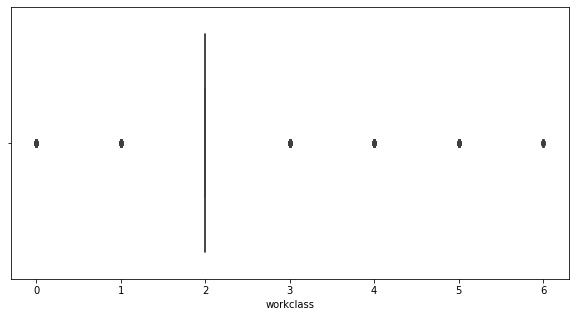

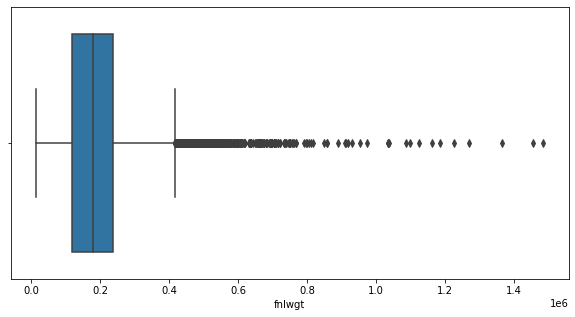

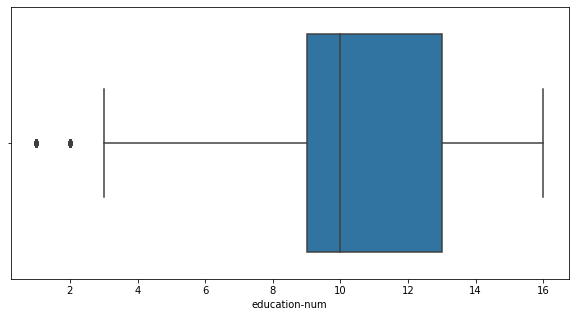

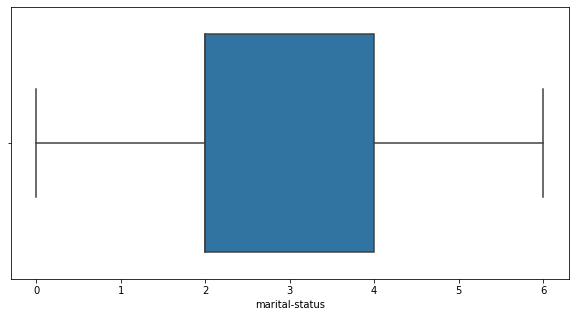

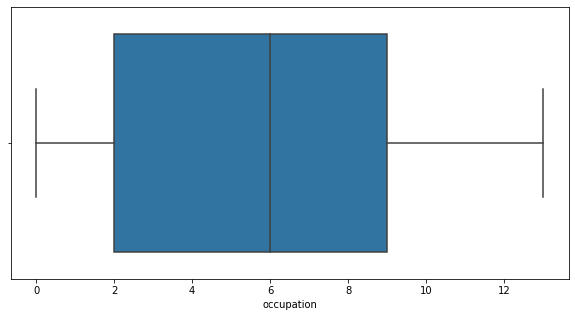

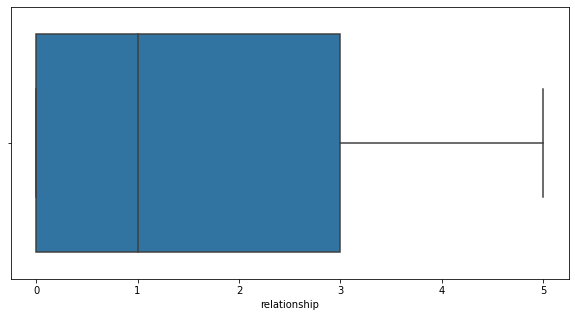

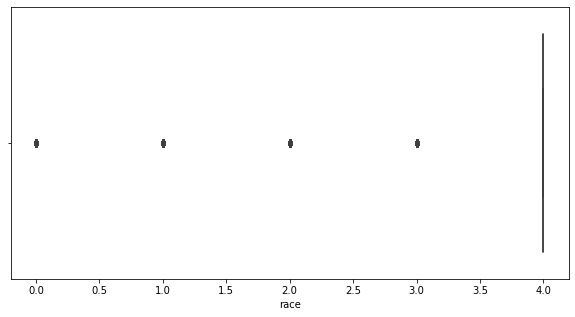

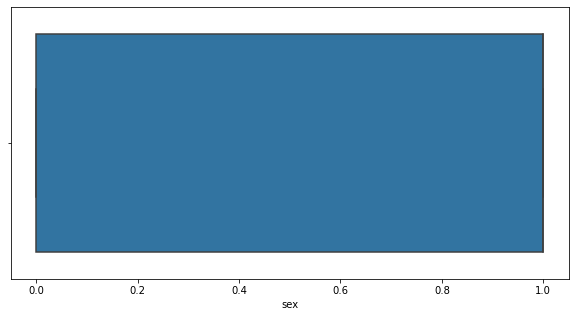

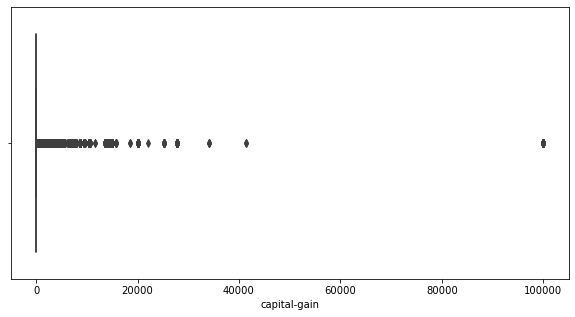

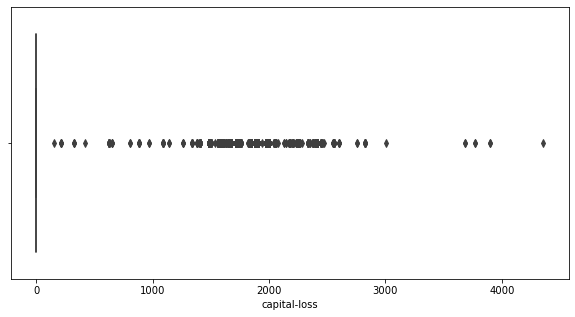

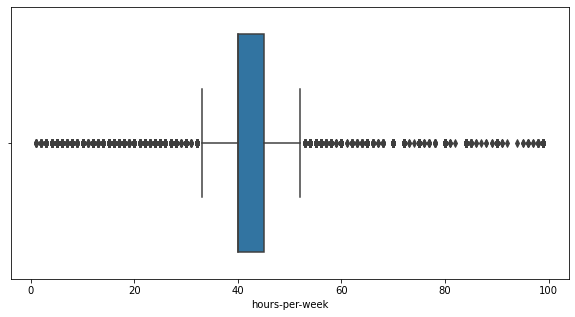

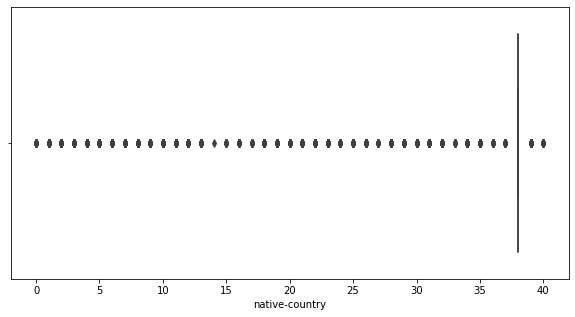

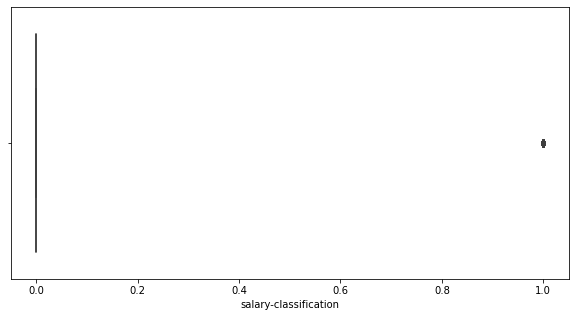

In [11]:
for key in training.keys():
    fig, ax = plt.subplots(figsize=(10,5))
    sns.boxplot(x=training[key])
    plt.show()

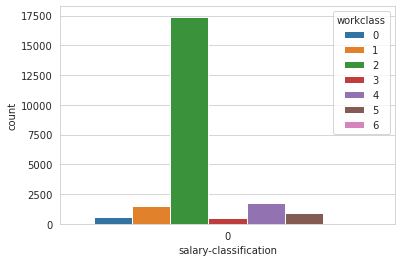

In [12]:
sns.set_style('whitegrid')
ax = sns.countplot(x='salary-classification',hue='workclass',data=training.loc[training['salary-classification'] == 0])

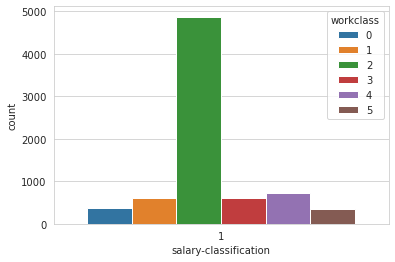

In [13]:
sns.set_style('whitegrid')
ax = sns.countplot(x='salary-classification',hue='workclass',data=training.loc[training['salary-classification'] == 1])

<AxesSubplot:xlabel='count', ylabel='salary-classification'>

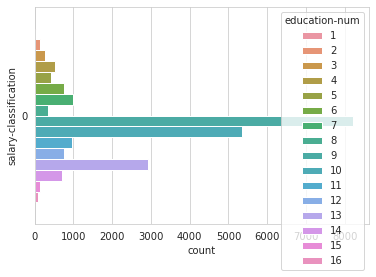

In [14]:
sns.countplot(y='salary-classification',hue='education-num',data=training.loc[training['salary-classification'] == 0])

<AxesSubplot:xlabel='count', ylabel='salary-classification'>

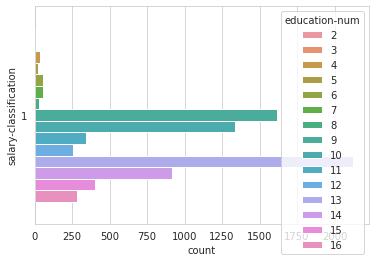

In [15]:
sns.countplot(y='salary-classification',hue='education-num',data=training.loc[training['salary-classification'] == 1])

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

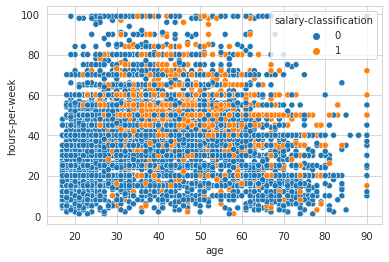

In [16]:
sns.scatterplot(data=training, x="age", y="hours-per-week", hue="salary-classification")